# MAC0460: Exercício Programa 2

**Aluna**: Julia Leite da Silva

**NUSP**: 11221797

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import numpy as np
from sklearn import metrics 

from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import make_scorer, accuracy_score

from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer


import warnings
warnings.filterwarnings("ignore")

In [2]:
# carregando os dados
df = pd.read_csv("pokemon.csv")

In [3]:
# constantes
NULL=-1
SEED=42

# Análise dos Dados

In [4]:
df.shape

(801, 41)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

In [6]:
df.describe().T

count          mean            std        min        25%  \
against_bug        801.0  9.962547e-01       0.597248       0.25        0.5   
against_dark       801.0  1.057116e+00       0.438142       0.25        1.0   
against_dragon     801.0  9.687890e-01       0.353058       0.00        1.0   
against_electric   801.0  1.073970e+00       0.654962       0.00        0.5   
against_fairy      801.0  1.068976e+00       0.522167       0.25        1.0   
against_fight      801.0  1.065543e+00       0.717251       0.00        0.5   
against_fire       801.0  1.135456e+00       0.691853       0.25        0.5   
against_flying     801.0  1.192884e+00       0.604488       0.25        1.0   
against_ghost      801.0  9.850187e-01       0.558256       0.00        1.0   
against_grass      801.0  1.034020e+00       0.788896       0.25        0.5   
against_ground     801.0  1.098002e+00       0.738818       0.00        1.0   
against_ice        801.0  1.208177e+00       0.735356       0.25        0.5   
against_normal     801.0  8.870162e-01       0.266106       0.00        1.0   
against_poison     801.0  9.753433e-01       0.549375       0.00        0.5   
against_psychic    801.0  1.005306e+00       0.495183       0.00        1.0   
against_rock       801.0  1.250312e+00       0.697148       0.25        1.0   
against_steel      801.0  9.834582e-01       0.500117       0.25        0.5   
against_water      801.0  1.058365e+00       0.606562       0.25        0.5   
attack             801.0  7.785768e+01      32.158820       5.00       55.0   
base_egg_steps     801.0  7.191011e+03    6558.220422    1280.00     5120.0   
base_happiness     801.0  6.536205e+01      19.598948       0.00       70.0   
base_total         801.0  4.283770e+02     119.203577     180.00      320.0   
defense            801.0  7.300874e+01      30.769159       5.00       50.0   
experience_growth  801.0  1.054996e+06  160255.835096  600000.00  1000000.0   
height_m           781.0  1.163892e+00       1.080326       0.10        0.6   
hp                 801.0  6.895880e+01      26.576015       1.00       50.0   
percentage_male    703.0  5.515576e+01      20.261623       0.00       50.0   
pokedex_number     801.0  4.010000e+02     231.373075       1.00      201.0   
sp_attack          801.0  7.130587e+01      32.353826      10.00       45.0   
sp_defense         801.0  7.091136e+01      27.942501      20.00       50.0   
speed              801.0  6.633458e+01      28.907662       5.00       45.0   
weight_kg          781.0  6.137810e+01     109.354766       0.10        9.0   
generation         801.0  3.690387e+00       1.930420       1.00        2.0   
is_legendary       801.0  8.739076e-02       0.282583       0.00        0.0   

                         50%        75%        max  
against_bug              1.0        1.0        4.0  
against_dark             1.0        1.0        4.0  
against_dragon           1.0        1.0        2.0  
against_electric         1.0        1.0        4.0  
against_fairy            1.0        1.0        4.0  
against_fight            1.0        1.0        4.0  
against_fire             1.0        2.0        4.0  
against_flying           1.0        1.0        4.0  
against_ghost            1.0        1.0        4.0  
against_grass            1.0        1.0        4.0  
against_ground           1.0        1.0        4.0  
against_ice              1.0        2.0        4.0  
against_normal           1.0        1.0        1.0  
against_poison           1.0        1.0        4.0  
against_psychic          1.0        1.0        4.0  
against_rock             1.0        2.0        4.0  
against_steel            1.0        1.0        4.0  
against_water            1.0        1.0        4.0  
attack                  75.0      100.0      185.0  
base_egg_steps        5120.0     6400.0    30720.0  
base_happiness          70.0       70.0      140.0  
base_total             435.0      505.0      780.0  
defense                 70.0      

In [7]:
df.head()

abilities  against_bug  against_dark  against_dragon  \
0  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0   
1  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0   
2  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0   
3     ['Blaze', 'Solar Power']          0.5           1.0             1.0   
4     ['Blaze', 'Solar Power']          0.5           1.0             1.0   

   against_electric  against_fairy  against_fight  against_fire  \
0               0.5            0.5            0.5           2.0   
1               0.5            0.5            0.5           2.0   
2               0.5            0.5            0.5           2.0   
3               1.0            0.5            1.0           0.5   
4               1.0            0.5            1.0           0.5   

   against_flying  against_ghost  ...  percentage_male  pokedex_number  \
0             2.0            1.0  ...             88.1               1   
1             2.0            1.0  ...             88.1               2   
2             2.0            1.0  ...             88.1               3   
3             1.0            1.0  ...             88.1               4   
4             1.0            1.0  ...             88.1               5   

   sp_attack  sp_defense  speed  type1   type2  weight_kg  generation  \
0         65          65     45  grass  poison        6.9           1   
1         80          80     60  grass  poison       13.0           1   
2        122         120     80  grass  poison      100.0           1   
3         60          50     65   fire     NaN        8.5           1   
4         80          65     80   fire     NaN       19.0           1   

   is_legendary  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 41 columns]

In [8]:
(df.isna().sum()/df.shape[0] * 100).sort_values(ascending=False).to_frame(
    name="Missing (%)"
).style.background_gradient(cmap="Reds")

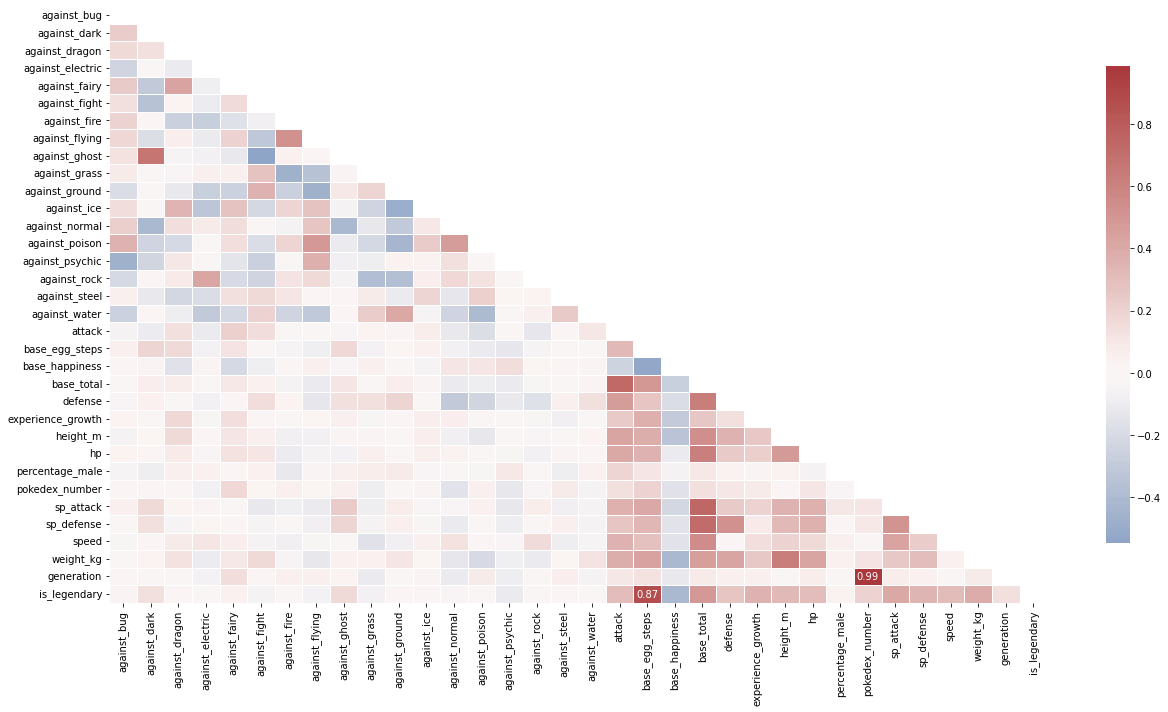

In [9]:
df_corr = df.corr(method="pearson")

labels = np.where(
    np.abs(df_corr) >= 0.75, np.round(df_corr[np.abs(df_corr) > 0.75], 2), ""
)

# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(18, 10))

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

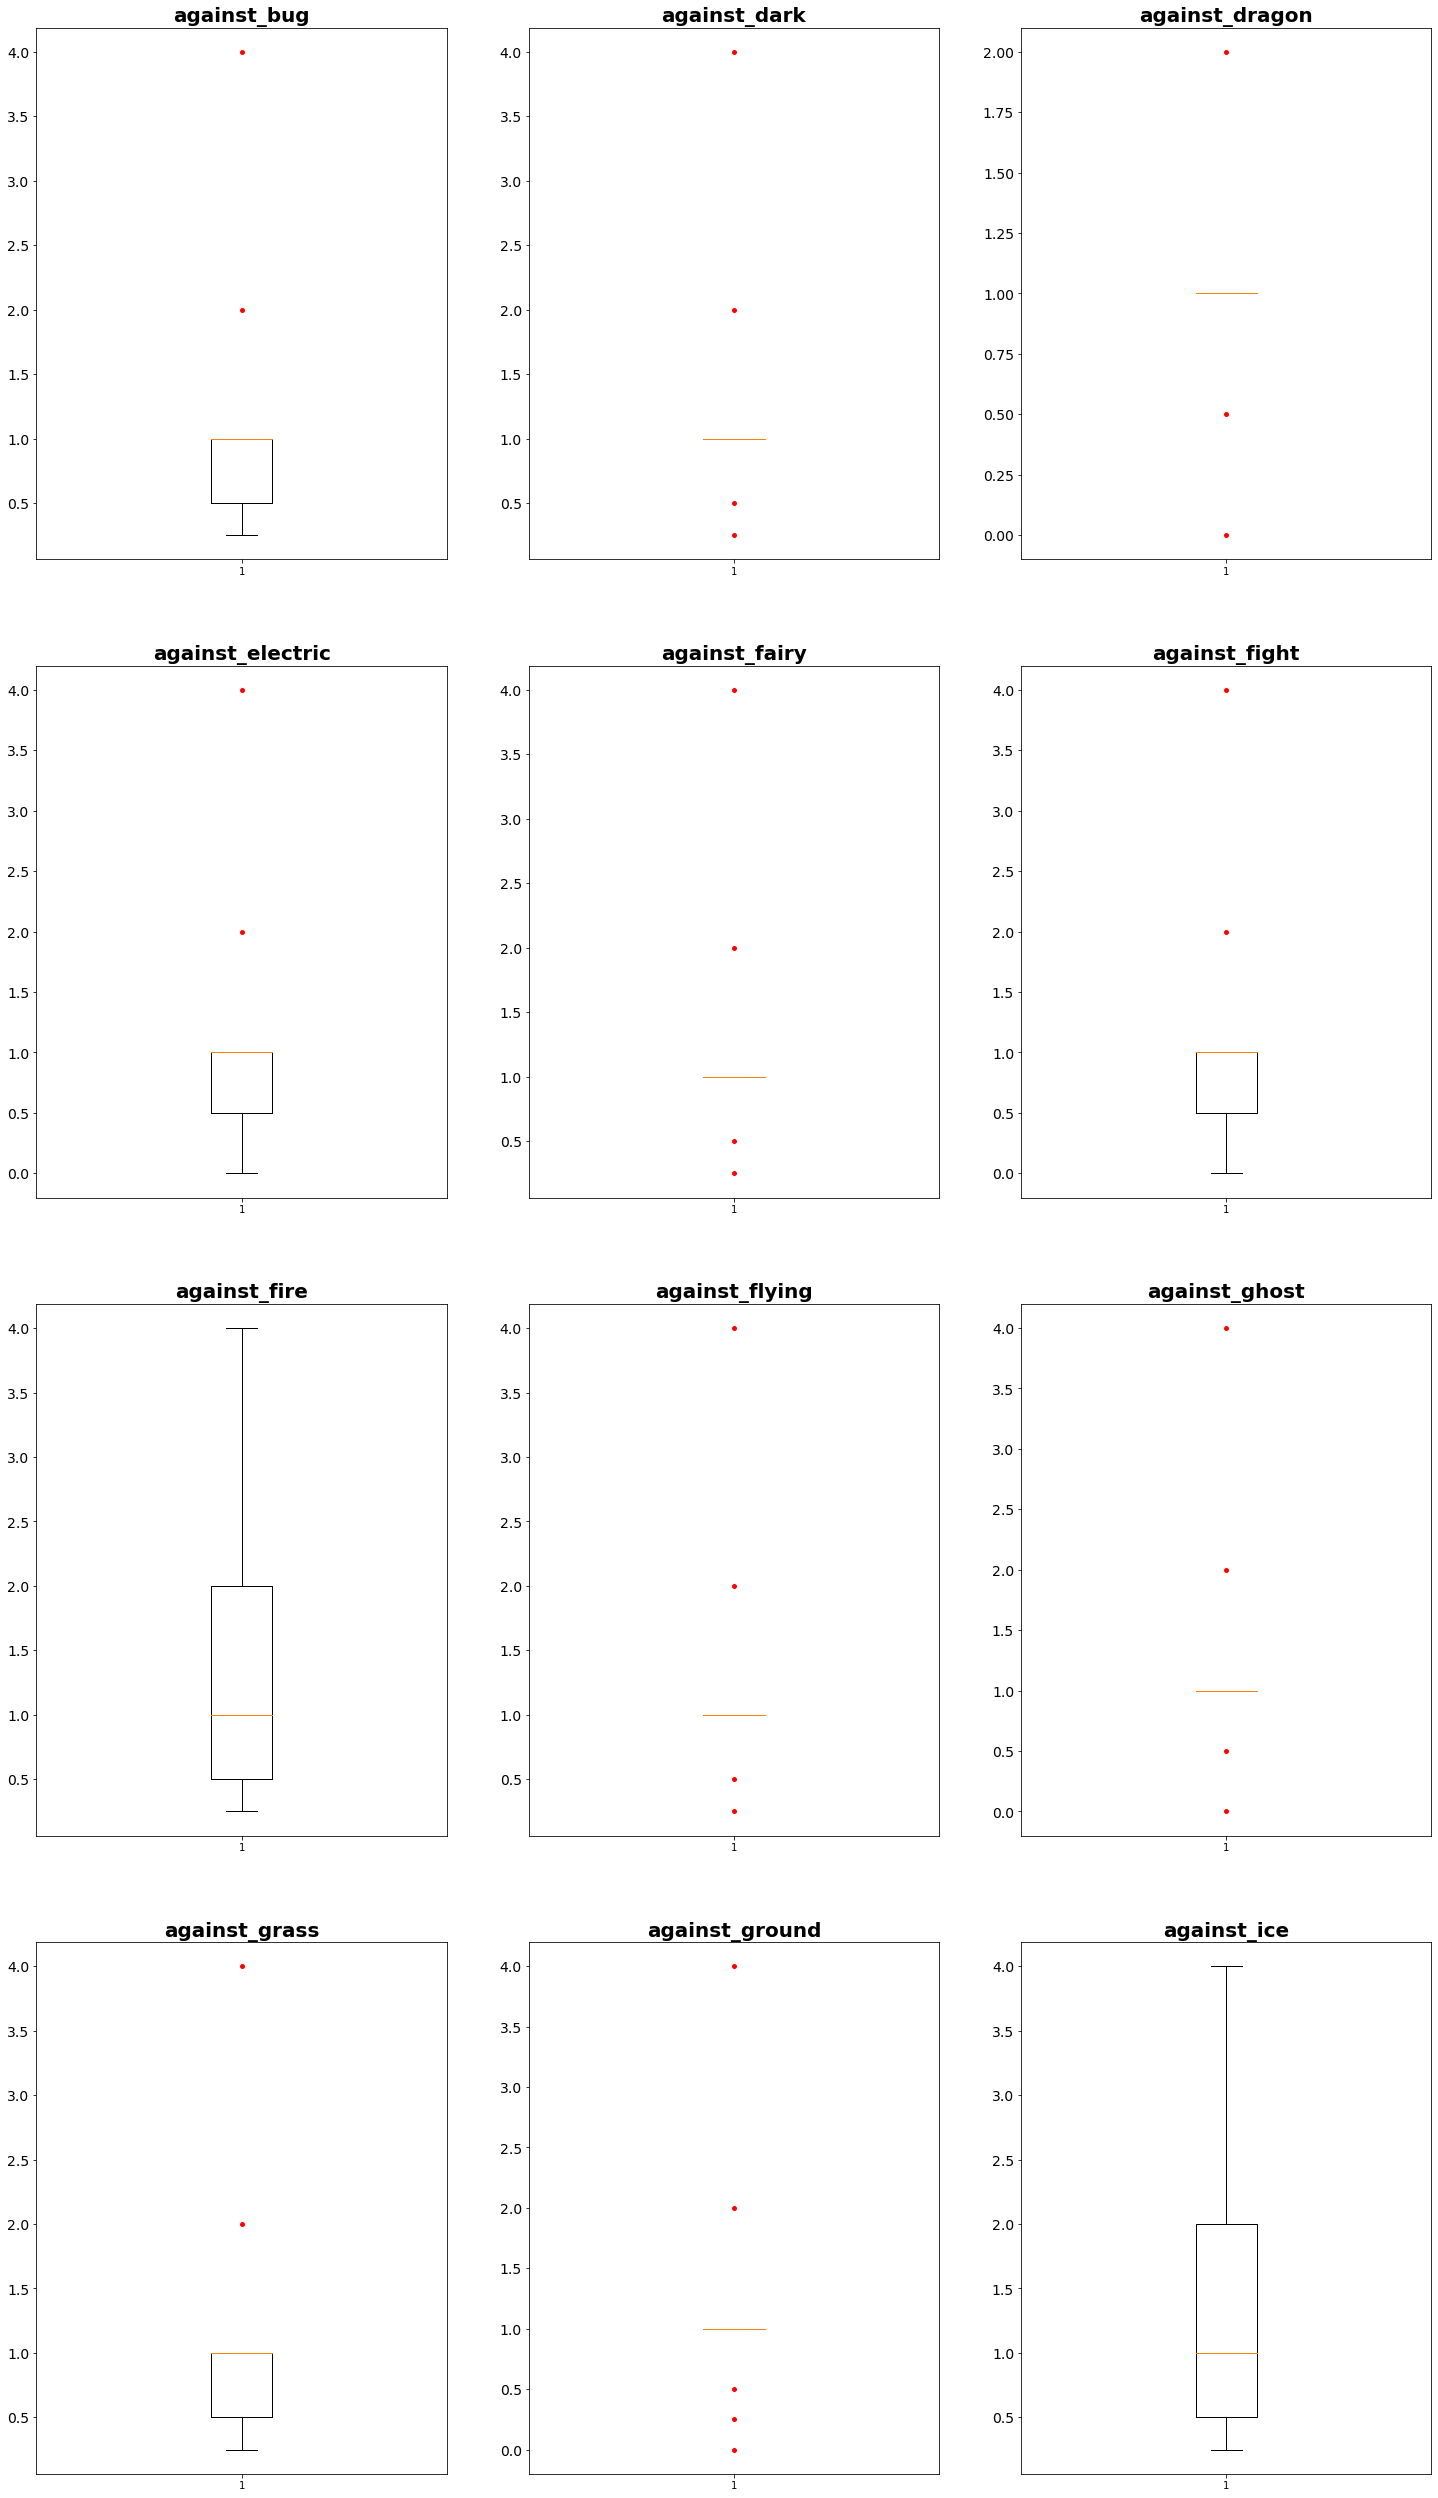

In [10]:
#Creating subplot of each column with its own scale
float64_columns = df.select_dtypes(include=['float64','int64']).columns
df_float64_columns = df[float64_columns]

red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')
fig, axs = plt.subplots(4, 3, figsize=(25,45))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df_float64_columns.iloc[:,i].dropna(), flierprops=red_circle)
    ax.set_title(df_float64_columns.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)

# Preparação dos Dados

Aqui vamos eliminar as colunas que devem ser descartadas segundo o enunciado e preparar os dados

In [11]:
dropped=['abilities', 'against_bug', 'against_dark', 'against_dragon',
        'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water','japanese_name', 'name',
         'pokedex_number', 'is_legendary', 'classfication', 'type2']

df=df.drop(dropped, axis=1)

In [12]:
# como queremos um classificador binário, vamos deixar apenas os pokemons com type 'water' e 'normal'
df = df[df['type1'].isin(['water', 'normal'])]

In [13]:
df['type1'] = df['type1'].replace({'water':1, 'normal':0})

In [14]:
df.head()

against_electric  attack  base_egg_steps  base_happiness  base_total  \
6                2.0      48            5120              70         314   
7                2.0      63            5120              70         405   
8                2.0     103            5120              70         630   
15               2.0      45            3840              70         251   
16               2.0      60            3840              70         349   

   capture_rate  defense  experience_growth  height_m  hp  percentage_male  \
6            45       65            1059860       0.5  44             88.1   
7            45       80            1059860       1.0  59             88.1   
8            45      120            1059860       1.6  79             88.1   
15          255       40            1059860       0.3  40             50.0   
16          120       55            1059860       1.1  63             50.0   

    sp_attack  sp_defense  speed  type1  weight_kg  generation  
6          50          64     43      1        9.0           1  
7          65          80     58      1       22.5           1  
8         135         115     78      1       85.5           1  
15         35          35     56      0        1.8           1  
16         50          50     71      0       30.0           1

In [15]:
df[df['height_m'].isna()]

against_electric  attack  base_egg_steps  base_happiness  base_total  \
18               1.0      56            3840              70         253   
19               1.0      71            3840              70         413   
51               1.0      35            5120              70         290   
52               1.0      60            5120              70         440   

   capture_rate  defense  experience_growth  height_m  hp  percentage_male  \
18          255       35            1000000       NaN  30             50.0   
19          127       70            1000000       NaN  75             50.0   
51          255       35            1000000       NaN  40             50.0   
52           90       60            1000000       NaN  65             50.0   

    sp_attack  sp_defense  speed  type1  weight_kg  generation  
18         25          35     72      0        NaN           1  
19         40          80     77      0        NaN           1  
51         50          40     90      0        NaN           1  
52         75          65    115      0        NaN           1

In [16]:
#  vamos usar -1 para marcar os valores como nulos sem ter que dropar as colunas
NULL=-1
df['height_m'] = df['height_m'].fillna(NULL)
df['weight_kg'] = df['weight_kg'].fillna(NULL)
df['percentage_male'] = df['percentage_male'].fillna(NULL)

## Separação entre treino, teste e validação

In [36]:
from sklearn.model_selection import train_test_split

x_full = df.drop('type1', axis=1)
y_full = df['type1']

x, x_val, y, y_val = train_test_split(x_full, y_full, test_size=0.25, random_state=SEED)

# Modelos

## Regressão Logística

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
# separacao de dados
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=SEED)

In [39]:
parametros_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga'],
    'max_iter': [10, 50, 100]
}
    
lr = LogisticRegression()

kfold = KFold(n_splits=5, shuffle=True, random_state=SEED)

grid_lr = GridSearchCV(lr, parametros_lr, cv=kfold)

grid_lr.fit(x_train, y_train)

print("Melhores parametros: ", grid_lr.best_params_)

Melhores parametros:  {'C': 10, 'max_iter': 10, 'penalty': 'l1', 'solver': 'liblinear'}


In [40]:
lr_best = grid_lr.best_estimator_

lr_best.fit(x_train, y_train)

y_pred_lr = grid_lr.predict(x_test)
print("Acuracia sem normalizacao:", metrics.accuracy_score(y_test, y_pred_lr))

Acuracia sem normalizacao: 0.8484848484848485


In [41]:
# vamos testar alguns metodos de normalizacao para ver se obtemos melhores resultados

scalers = [StandardScaler(), MinMaxScaler(), PowerTransformer()]

for scaler in scalers:
    
    x_train_norm = scaler.fit_transform(x_train)
    x_test_norm = scaler.transform(x_test)
    lr_norm = grid_lr.best_estimator_
    lr_norm.fit(x_train_norm, y_train)
    y_pred_lr_norm=lr_norm.predict(x_test_norm)
    print("Acuracia:", metrics.accuracy_score(y_test, y_pred_lr_norm))

Acuracia: 0.7878787878787878
Acuracia: 0.7575757575757576
Acuracia: 0.7878787878787878


In [42]:
pd.DataFrame(y_pred_lr).to_csv('dados/y_pred_lr.csv', index=False)

## SVM

In [86]:
from sklearn.svm import SVC

In [87]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=SEED)

In [88]:
parametros_svc = {
    'C': [0.001, 0.1, 1, 2, 10],
    'gamma': [0.1, 1, 'scale', 'auto'],
    'max_iter': [10, 20, 30, 100, 200, 1000],
    'kernel': ['linear', 'rbf']
}

svm = SVC(random_state=SEED)

kfold = KFold(n_splits=5, shuffle=True, random_state=SEED)

grid_svm = GridSearchCV(svm, parametros_svc, cv=kfold)

In [89]:
grid_svm.fit(x_train, y_train)

print("Melhores parâmetros encontrados: ", grid_svm.best_params_)

svm_best = grid_svm.best_estimator_

svm_best.fit(x_train, y_train)
    
y_pred_svm = svm_best.predict(x_test)

print("Acuracia:", metrics.accuracy_score(y_test, y_pred_svm))

Melhores parâmetros encontrados:  {'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf', 'max_iter': 30}
Acuracia: 0.5757575757575758


In [90]:
# vamos testar alguns metodos de normalizacao para ver se obtemos melhores resultados

scalers = [StandardScaler(), MinMaxScaler(), PowerTransformer()]

for scaler in scalers:
    
    x_train_norm = scaler.fit_transform(x_train)
    x_test_norm = scaler.transform(x_test)
    svm_norm = grid_svm.best_estimator_
    svm_norm.fit(x_train_norm, y_train)
    y_pred_svm_norm=svm_norm.predict(x_test_norm)
    print("Acuracia:", metrics.accuracy_score(y_test, y_pred_svm_norm))

Acuracia: 0.6060606060606061
Acuracia: 0.7272727272727273
Acuracia: 0.7878787878787878


## Árvore de Decisão

In [43]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import make_scorer, accuracy_score

In [44]:
# separacao de dados
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=SEED)

In [45]:
dt = DecisionTreeClassifier(random_state=SEED)

# parametros_dt = {
#     'criterion':['gini', 'entropy', 'log_loss'],
#     'max_depth': [None, 3, 4, 5,10,50],
#     'min_samples_split': [2, 5,10,50,100]
# }

parametros_dt = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 3, 4, 5,10,50],
    'min_samples_split': [1,2, 5,10]
}

kfold = KFold(n_splits=5, shuffle=True, random_state=SEED)

grid_dt = GridSearchCV(dt, parametros_dt, cv=kfold)

grid_dt.fit(x_train, y_train)

print("Melhores parametros: ", grid_dt.best_params_)

Melhores parametros:  {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 10}


In [46]:
dt_best = grid_dt.best_estimator_

dt_best.fit(x_train, y_train)
    
y_pred_dt = dt_best.predict(x_test)
print("Acuracia:", metrics.accuracy_score(y_test, y_pred_dt))

Acuracia: 0.8787878787878788


In [47]:
# salvando os resultados em um arquivo apenas por seguranca
pd.DataFrame(y_pred_dt).to_csv("dados/y-pred-dt.csv", index=False)

## Random Forest

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
# separacao de dados
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=SEED)

In [67]:
parametros_rf = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'n_estimators': [10,50,100],
    'max_depth': [ None, 2, 5, 10],
    'class_weight': [None, 'balanced', 'balanced_subsample'],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': [1, 7]
}

rf = RandomForestClassifier(random_state=SEED)

kfold = KFold(n_splits=5, shuffle=True, random_state=SEED)

grid_rf = GridSearchCV(rf, parametros_rf, cv=kfold)

grid_rf.fit(x_train, y_train)

print("Melhores parâmetros encontrados: ", grid_rf.best_params_)

Melhores parâmetros encontrados:  {'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_depth': None, 'max_features': 7, 'min_samples_leaf': 10, 'n_estimators': 10}


In [68]:
rf_best = grid_rf.best_estimator_

rf_best.fit(x_train, y_train)
    
y_pred_rf = rf_best.predict(x_test)
print("Acuracia:", metrics.accuracy_score(y_test, y_pred_rf))

Acuracia: 0.8484848484848485


In [69]:
pd.DataFrame(y_pred_rf).to_csv("dados/y-pred-rf.csv", index=False)